In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
import cv2

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/object_detection_final.h5")

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DLDataset/images_labeled_xml/N1.jpeg")
image_array = np.array(image, dtype=np.uint8)
print(image_array.shape)
h, w, d = image_array.shape

image_test = load_img("/content/drive/MyDrive/DLDataset/images_labeled_xml/N1.jpeg", target_size=(224,224))
image_test_arr = img_to_array(image_test) / 255.0

(1080, 1920, 3)


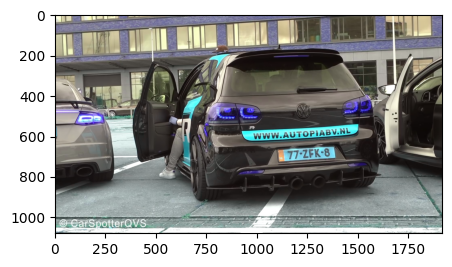

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.imshow(image)
plt.show()

In [ ]:
image_test_arr_reshaped = image_test_arr.reshape(1,224,224,3)
image_test_arr_reshaped

In [ ]:
image_test_arr_reshaped.shape

(1, 224, 224, 3)

In [ ]:
coords = model.predict(image_test_arr_reshaped)
coords

1/1 [==============================] - 4s 4s/step


array([[0.5665953 , 0.71392834, 0.5795552 , 0.69152015]], dtype=float32)

In [ ]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[1087.86300659, 1370.74241638,  625.91963053,  746.84176683]])

In [ ]:
coords = coords.astype(np.int32)

In [ ]:
coords

array([[1087, 1370,  625,  746]], dtype=int32)

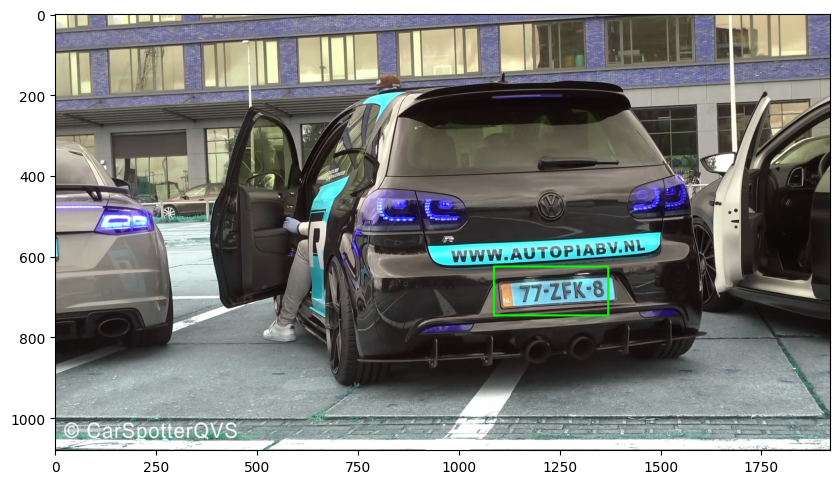

In [ ]:
cv2.rectangle(image, (1087,625), (1370,746), (0,255,0), 3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
def object_detection(image_path):
  image = cv2.imread(image_path)
  image_array = np.array(image, dtype=np.uint8)
  h, w, d = image_array.shape

  image_test = load_img(image_path, target_size=(224,224))
  image_test_arr = img_to_array(image_test) / 255.0
  image_test_arr_reshaped = image_test_arr.reshape(1,224,224,3)

  coords = model.predict(image_test_arr_reshaped)

  denorm = np.array([w,w,h,h])
  coords = coords * denorm
  coords = coords.astype(np.int32)

  xmin, xmax, ymin, ymax = coords[0]

  cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,255,0), 3)

  return image, coords

In [ ]:
image_path = "/content/drive/MyDrive/DLDataset/images_labeled_xml/N147.jpeg"
output_image, coordinates = object_detection(image_path)

1/1 [==============================] - 0s 452ms/step


In [ ]:
coordinates

array([[398, 612, 552, 606]], dtype=int32)

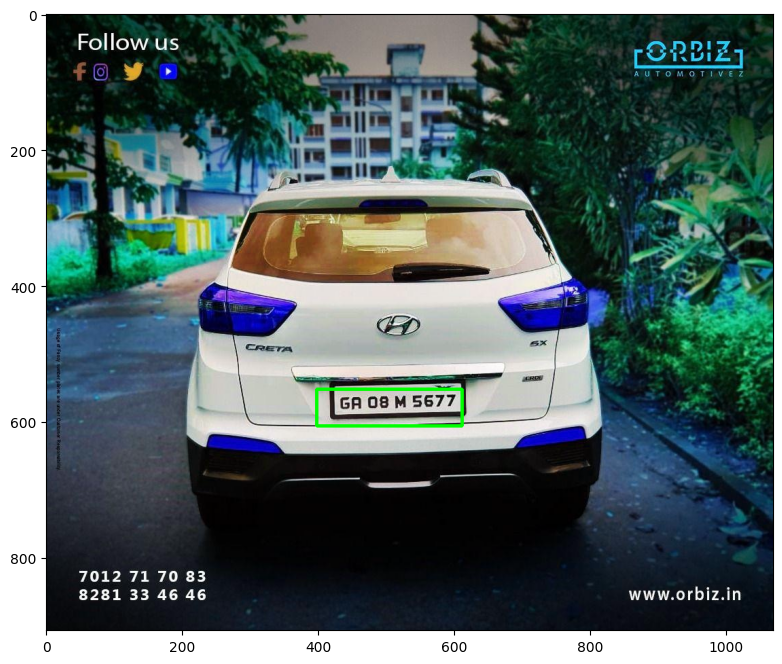

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(output_image)
plt.show()

In [ ]:
coordinates[0]

array([398, 612, 552, 606], dtype=int32)

In [ ]:
img = np.array(load_img(image_path))
xmin, xmax, ymin, ymax = coordinates[0]
roi = img[ymin:ymax, xmin:xmax]

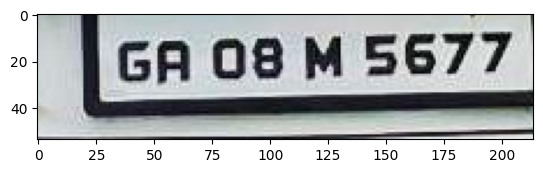

In [ ]:
plt.imshow(roi)
plt.show()

In [ ]:
!pip install --upgrade pytesseract

In [ ]:
import pytesseract as pt

In [35]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,515 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [37]:
text = pt.image_to_string(roi)
print(text)

[cA 08M5677

